# Tutorial 11 - Introduction to statistical inference

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Describe real world examples of questions that can be answered with the statistical inference methods.
- Name common population parameters (e.g., mean, proportion, median, variance, standard deviation) that are often estimated using sample data, and use computation to estimate these.
- Define the following statistical sampling terms (population, sample, population parameter, point estimate, sampling distribution).
- Explain the difference between a population parameter and sample point estimate.
- Use computation to draw random samples from a finite population.
- Use computation to create a sampling distribution from a finite population.
- Describe how sample size influences the sampling distribution.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
source('tests_tutorial_11.R')
source('cleanup_tutorial_11.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




###  Virtual sampling simulation

In this tutorial you will study samples and sample means generated from different distributions. In real life, we rarely, if ever, have measurements for our entire population. Here, however, we will make simulated datasets so we can understand the behaviour of sample means.

Suppose we had the data science final grades for a large population of students. 

In [2]:
# run this cell to simulate a finite population
set.seed(20201) # DO NOT CHANGE
students_pop <- tibble(grade = (rnorm(mean = 70, sd = 8, n = 10000)))
head(students_pop)

grade
<dbl>
82.47102
73.29210
72.24852
65.72263
67.12657
66.50734


**Question 1.0** 
<br> {points: 1}

Visualize the distribution of the population (`students_pop`) that was just created by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `pop_dist` and give x axis a descriptive label.

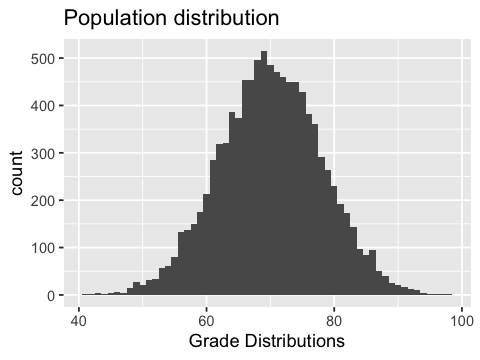

In [12]:
options(repr.plot.width = 4, repr.plot.height = 3)
#pop_dist <- ggplot(..., ...) + 
#    geom_...(...) +
#    ... +
#    ggtitle("Population distribution")

# your code here
pop_dist <- ggplot(students_pop, aes(grade)) + 
   geom_histogram(binwidth=1) +
   labs(x = "Grade Distributions") +
   ggtitle("Population distribution")
pop_dist

In [5]:
test_1.0()

[1] "Success!"


**Question 1.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. 

The distribution seen above is a unimodal distribution that is close to normally distributed. The mean and median are approximately the same; the mean can be calculated using `mean(students_pop$grade) = 70.03`; the standard deviation can be calculated using `sd(students_pop$grade) = 8.05`.

**Question 1.2** 
<br> {points: 1}

Use `summarise` to calculate the following population parameters from the `students_pop` population:
- mean (use the `mean` function)
- median (use the `median` function)
- standard deviation (use the `sd` function)

Name this data frame `pop_parameters` which has the column names `pop_mean`, `pop_med` and `pop_sd`.

In [18]:
# your code here
pop_parameters = students_pop %>%
    summarise(pop_mean = mean(grade), pop_med = median(grade), pop_sd = sd(grade))
pop_parameters

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
70.03288,70.01299,8.05165


In [19]:
test_1.2()

[1] "Success!"


### Exploring the sampling distribution of the sample mean for different populations
We will create the sampling distribution of the sample mean by taking 1500 random samples of size 5 from this population and visualize the distribution of the sample means. 


**Question 1.3** 
<br> {points: 1}

Draw 1500 random samples from our population of students (`students_pop`). Each sample should have 5 observations. Name the data frame `samples` and use the seed `4321`.

In [20]:
#samples <- rep_sample_n(..., size = ..., reps = ...)
set.seed(4321) # DO NOT CHANGE!
# your code here
samples <- rep_sample_n(students_pop, size = 5, reps = 1500)
head(samples)
tail(samples)
dim(samples)

replicate,grade
<int>,<dbl>
1,59.23913
1,76.06602
1,73.51820
1,92.08262
1,47.91240
2,85.42029


replicate,grade
<int>,<dbl>
1499,67.25662
1500,71.57016
1500,62.44389
1500,76.56512
1500,71.66241
1500,76.21743


[1] 7500    2

In [21]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 1}

Group by the sample replicate number, and then for each sample, calculate the mean. Name the data frame `sample_estimates`. The data frame should have the column names `replicate` and `sample_mean`.

In [24]:
# your code here
sample_estimates = samples %>%
    group_by(replicate) %>%
    summarize(sample_mean = mean(grade))
head(sample_estimates)
tail(sample_estimates)

replicate,sample_mean
<int>,<dbl>
1,69.76367
2,75.22476
3,69.90881
4,66.11345
5,75.26159
6,63.41461


replicate,sample_mean
<int>,<dbl>
1495,65.80124
1496,66.44409
1497,67.86570
1498,69.39292
1499,70.64449
1500,71.69180


In [25]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 1}

Visualize the distribution of the sample estimates (`sample_estimates`) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution` and give the plot (using `ggtitle`) and the x axis a descriptive label.

mean of sample means =  69.91066 
sd of sample means =  3.563243

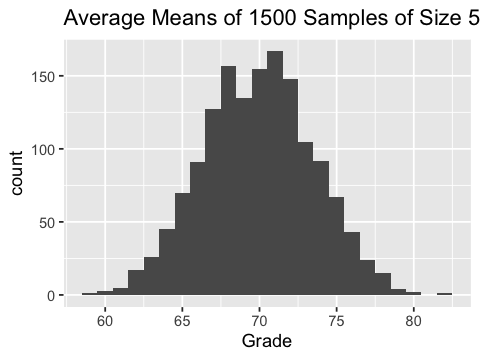

In [39]:
# your code here
sampling_distribution_5 = sample_estimates %>%
    ggplot(aes(sample_mean)) +
        geom_histogram(binwidth = 1) +
        labs(title = "Average Means of 1500 Samples of Size 5", x = "Grade")
sampling_distribution_5
cat("mean of sample means = ", mean(sample_estimates$sample_mean), "\n")
cat("sd of sample means = ", sd(sample_estimates$sample_mean))

In [28]:
test_1.5()

[1] "Success!"


**Question 1.6** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution of students' grades above. 

The distribution above is still unimodal and normally distrubuted (although arguably, you could say that it is bimodal; however, for the purposes of this description, I will refer to it as unimodal). The mean and median are approximately equal. 

Compared to the population distribution of students' grades above, the mean is fairly similar (`70.03` vs `69.91`). However, the standard deviation is much lower (sd of plot in Q1.5 is `3.56`; sd of plot in Q1.0 is `8.05`).

**Question 1.7**
<br> {points: 1}

Let's create a simulated dataset of the number of cups of coffee drunk per week for our population of students. 
Describe in words the distribution, comment on the shape, center and how spread out the distribution is. 

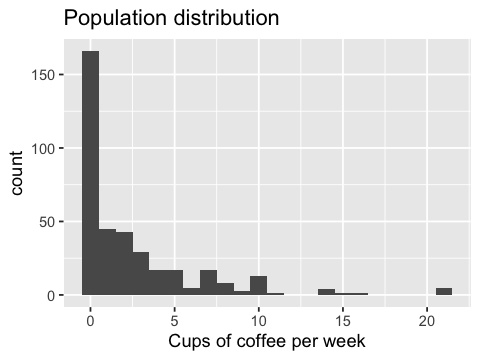

In [40]:
# run this cell to simulate a finite population
coffee_data = tibble(cups = c(
  rep(0, 166),  rep(1 ,45),
  rep(2,43),  rep(3,29),
  rep(4, 17), rep(5, 17),
  rep(6, 5),  rep(7, 17),
  rep(8, 8),  rep(9, 3),
  rep(10, 13),  rep(11, 1),
  rep(12, 0),  rep(13, 0),
  rep(14, 4),  rep(15, 1),
  rep(16, 1),  rep(21, 5)))

pop_dist <- ggplot(coffee_data, aes(cups)) + 
    geom_histogram(binwidth = 1) +
    xlab("Cups of coffee per week") +
    ggtitle("Population distribution") 
pop_dist

The dist. above is a right skewing unimodal distribution. It could also be characterized as similar to a poisson distribution with a `mean = 2.517` and a `median = 1`. The spread of the distribution ranges from 0 to ~20 and the `sd = 3.82`.

**Question 1.8**
<br> {points: 1}
Repeat the steps in questions 1.3 - 1.5 with sample size 5, for this coffee population. You should end up with a plot of the sampling distribution called `sampling_distribution_5`.

mean of coffee_data =  2.517333 
sd of coffee_data =  3.820028 
median of coffee_data =  1 

mean of sample means =  2.477311 
sd of sample means =  0.6612791 
median of sample means =  2.433333

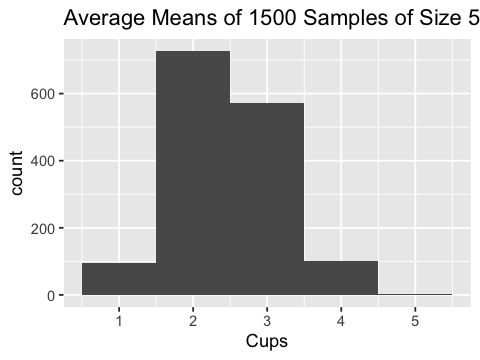

In [55]:
set.seed(4321) # DO NOT CHANGE!

# your code here
sample_estimates_5 = coffee_data %>%
    rep_sample_n(size = 5, reps = 1500) %>%
    group_by(replicate) %>%
    summarize(sample_mean = mean(cups)) 
sampling_distribution_5 = sample_estimates %>%
    ggplot(aes(sample_mean)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Average Means of 1500 Samples of Size 5", x = "Cups")
sampling_distribution_5
cat("mean of coffee_data = ", mean(coffee_data$cups), "\n")
cat("sd of coffee_data = ", sd(coffee_data$cups), "\n")
cat("median of coffee_data = ", median(coffee_data$cups), "\n\n")
cat("mean of sample means = ", mean(sample_estimates$sample_mean), "\n")
cat("sd of sample means = ", sd(sample_estimates$sample_mean), "\n")
cat("median of sample means = ", median(sample_estimates$sample_mean))

In [46]:
test_1.8()

[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution to the population distribution above. 

The shape is similar to that seen in Q1.7 in that:

- unimodal
- right skewing
- poisson-shaped distribution
- the mean is similar (`2.517` vs `2.53`)

It is different in that:

- the median is higher (`2.2` vs `1`)
- the sd is smaller (`1.72` vs `3.82`), meaning the spread is narrower

**Question 2.0** 
<br> {points: 1}

Repeat the steps in questions 1.3 - 1.5 with sample size 30, for this coffee population. You should end up with a plot of the sampling distribution called `sampling_distribution_30`.

mean of sample means (5) =  2.531733 
sd of sample means (5) =  1.721296 
median of sample means (5) =  2.2 

mean of sample means (30) =  2.477311 
sd of sample means (30) =  0.6612791 
median of sample means (30) =  2.433333 



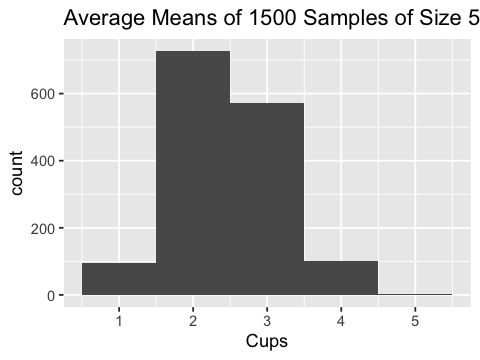

In [56]:
set.seed(4321) # DO NOT CHANGE!

# your code here
sample_estimates_30 = coffee_data %>%
    rep_sample_n(size = 30, reps = 1500) %>%
    group_by(replicate) %>%
    summarize(sample_mean = mean(cups)) 
sampling_distribution_30 = sample_estimates %>%
    ggplot(aes(sample_mean)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Average Means of 1500 Samples of Size 5", x = "Cups")
sampling_distribution_30
cat("mean of sample means (5) = ", mean(sample_estimates_5$sample_mean), "\n")
cat("sd of sample means (5) = ", sd(sample_estimates_5$sample_mean), "\n")
cat("median of sample means (5) = ", median(sample_estimates_5$sample_mean), "\n\n")
cat("mean of sample means (30) = ", mean(sample_estimates_30$sample_mean), "\n")
cat("sd of sample means (30) = ", sd(sample_estimates_30$sample_mean), "\n")
cat("median of sample means (30) = ", median(sample_estimates_30$sample_mean), "\n\n")

In [54]:
test_2.0()

[1] "Success!"


**Question 2.1** 
<br> {points: 3}

Describe in words the distribution above, comment on the shape, center and how spread out the distribution is. Compare this sampling distribution with samples of size 30 to the sampling distribution with samples of size 5. 

The shape is similar to the sampling dist. with size 5 in that:

- unimodal
- right skewing
- poisson-shaped distribution
- the mean is similar (`2.53` vs `2.477`), although we do see the mean converging on the median

It is different in that:

- the median is slightly higher (`2.43` vs `2.2`) and we see it converging on the mean
- the sd is smaller (`0.66` vs `1.72`), meaning the spread is narrower

As the sample size gets higher, the sd becomes smaller and the median converges on the mean.